In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [224]:
df=pd.read_csv('EV_Charging_Station.csv')
df

,Station_ID,City,Day_Type,Hour,Number_of_Chargers,Past_Occupancy_Rate,Weather,Occupancy
0,1039,Delhi,Weekday,1.0,3.0,0.65,Cloudy,0
1,1029,Bangalore,Weekend,7.0,11.0,0.11,Rainy,0
2,1015,Hyderabad,Weekday,6.0,16.0,0.91,Rainy,0
3,1043,Bangalore,Weekend,7.0,18.0,0.35,Sunny,0
4,1008,Kochi,Weekday,12.0,14.0,0.51,Sunny,1
...,...,...,...,...,...,...,...,...
9995,1026,Delhi,Weekday,10.0,3.0,0.92,Sunny,1
9996,1022,Hyderabad,Weekday,15.0,16.0,0.84,Sunny,1
9997,1031,Trivandrum,Weekend,4.0,12.0,0.38,Sunny,0
9998,1043,Trivandrum,Weekday,11.0,17.0,0.73,Rainy,1


In [225]:
df.shape

(10000, 8)

In [226]:
df.size

80000

In [227]:
df.dtypes

Station_ID               int64
City                    object
Day_Type                object
Hour                   float64
Number_of_Chargers     float64
Past_Occupancy_Rate    float64
Weather                 object
Occupancy                int64
dtype: object

In [228]:
df.head()

,Station_ID,City,Day_Type,Hour,Number_of_Chargers,Past_Occupancy_Rate,Weather,Occupancy
0,1039,Delhi,Weekday,1.0,3.0,0.65,Cloudy,0
1,1029,Bangalore,Weekend,7.0,11.0,0.11,Rainy,0
2,1015,Hyderabad,Weekday,6.0,16.0,0.91,Rainy,0
3,1043,Bangalore,Weekend,7.0,18.0,0.35,Sunny,0
4,1008,Kochi,Weekday,12.0,14.0,0.51,Sunny,1


In [229]:
df.tail()

,Station_ID,City,Day_Type,Hour,Number_of_Chargers,Past_Occupancy_Rate,Weather,Occupancy
9995,1026,Delhi,Weekday,10.0,3.0,0.92,Sunny,1
9996,1022,Hyderabad,Weekday,15.0,16.0,0.84,Sunny,1
9997,1031,Trivandrum,Weekend,4.0,12.0,0.38,Sunny,0
9998,1043,Trivandrum,Weekday,11.0,17.0,0.73,Rainy,1
9999,1010,Trivandrum,Weekday,16.0,5.0,0.85,Sunny,1


In [230]:
df.isna().sum()

Station_ID              0
City                    0
Day_Type                0
Hour                   33
Number_of_Chargers     32
Past_Occupancy_Rate    33
Weather                 0
Occupancy               0
dtype: int64

In [231]:
print("\nMissing values:\n")
print(df.isnull().sum())



Missing values:

Station_ID              0
City                    0
Day_Type                0
Hour                   33
Number_of_Chargers     32
Past_Occupancy_Rate    33
Weather                 0
Occupancy               0
dtype: int64


In [232]:
df["Hour"].fillna(df["Hour"].median(), inplace=True)
df["Number_of_Chargers"].fillna(df["Number_of_Chargers"].median(), inplace=True)
df["Past_Occupancy_Rate"].fillna(df["Past_Occupancy_Rate"].median(), inplace=True)

C:\Users\amal\AppData\Local\Temp\ipykernel_12580\1063698238.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Hour"].fillna(df["Hour"].median(), inplace=True)
C:\Users\amal\AppData\Local\Temp\ipykernel_12580\1063698238.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [233]:
df.isna().sum()

Station_ID             0
City                   0
Day_Type               0
Hour                   0
Number_of_Chargers     0
Past_Occupancy_Rate    0
Weather                0
Occupancy              0
dtype: int64

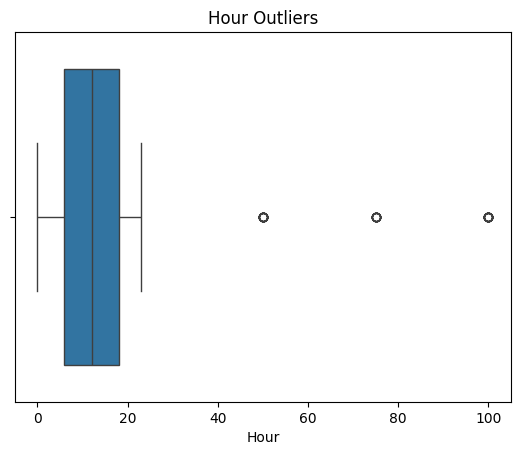

In [234]:
plt.figure()
sns.boxplot(x=df["Hour"])
plt.title("Hour Outliers")
plt.show()

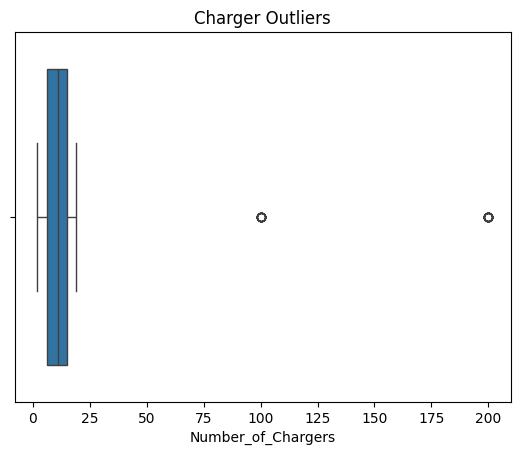

In [235]:
plt.figure()
sns.boxplot(x=df["Number_of_Chargers"])
plt.title("Charger Outliers")
plt.show()

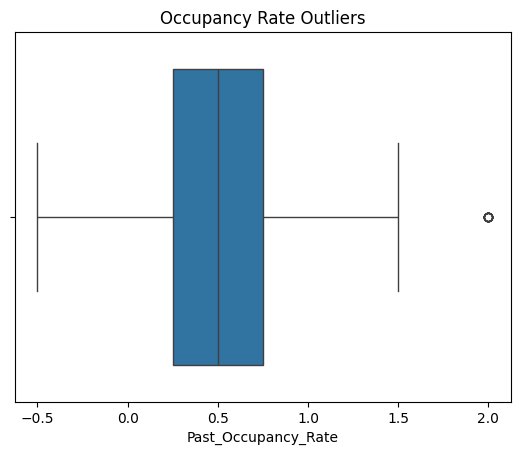

In [236]:
plt.figure()
sns.boxplot(x=df["Past_Occupancy_Rate"])
plt.title("Occupancy Rate Outliers")
plt.show()

In [237]:
def remove_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[col].clip(lower, upper)

df["Hour"] = remove_outliers("Hour")
df["Number_of_Chargers"] = remove_outliers("Number_of_Chargers")
df["Past_Occupancy_Rate"] = remove_outliers("Past_Occupancy_Rate")

In [238]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["City"] = le.fit_transform(df["City"])
df["Day_Type"] = le.fit_transform(df["Day_Type"])
df["Weather"] = le.fit_transform(df["Weather"])

In [239]:
X = df.drop(["Occupancy"], axis=1)
y = df["Occupancy"]

In [240]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [241]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train

array([[-0.04325524,  1.48808942, -1.0086373 , ...,  0.2670183 ,
        -1.15541615, -0.01387603],
       [-0.11297677, -0.50880996,  0.99143666, ..., -0.88483286,
        -1.22354772, -1.24184335],
       [ 1.28145384,  0.98886458,  0.99143666, ..., -1.26878325,
        -1.01915299, -1.24184335],
       ...,
       [ 1.00256772,  0.98886458, -1.0086373 , ..., -1.46075844,
         0.00282065,  1.21409129],
       [ 1.14201078, -1.50725966,  0.99143666, ...,  0.84294387,
        -0.06531093,  1.21409129],
       [ 0.58423853,  0.48963973,  0.99143666, ..., -1.65273363,
         1.33138638, -1.24184335]], shape=(7000, 7))

In [242]:
X_test

array([[ 0.37507394,  0.98886458,  0.99143666, ..., -0.50088248,
         0.61600483, -1.24184335],
       [-1.36796431,  0.48963973, -1.0086373 , ...,  0.45899349,
        -1.35981087, -0.01387603],
       [ 0.79340313, -0.00958512,  0.99143666, ..., -1.26878325,
        -1.12135036, -0.01387603],
       ...,
       [ 1.63006149, -0.00958512,  0.99143666, ...,  1.03491907,
         0.03688644,  1.21409129],
       [ 1.56033996,  1.48808942,  0.99143666, ..., -0.88483286,
         0.78633377, -0.01387603],
       [-1.29824278,  0.98886458, -1.0086373 , ...,  1.61084465,
         0.92259692, -1.24184335]], shape=(3000, 7))

In [243]:
y_train


9069    0
2603    0
7738    0
1579    0
5058    0
       ..
5734    0
5191    0
5390    0
860     0
7270    1
Name: Occupancy, Length: 7000, dtype: int64

In [244]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
8014    0
1074    0
3063    0
6487    0
4705    1
Name: Occupancy, Length: 3000, dtype: int64

In [245]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [246]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:",
      accuracy_score(y_test, lr_pred))

Logistic Regression Accuracy: 0.7933333333333333


In [247]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("KNN Accuracy:",
      accuracy_score(y_test, knn_pred))


KNN Accuracy: 0.9173333333333333


In [248]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print("Naive Bayes Accuracy:",
      accuracy_score(y_test, nb_pred))

Naive Bayes Accuracy: 0.8936666666666667


In [249]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree Accuracy:",
      accuracy_score(y_test, dt_pred))

Decision Tree Accuracy: 0.995


In [250]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:",
      accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.9973333333333333


In [251]:
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("SVM Accuracy:",
      accuracy_score(y_test, svm_pred))

SVM Accuracy: 0.956


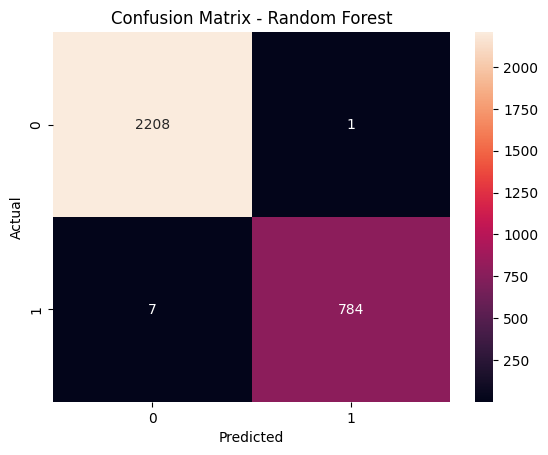

In [252]:
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [253]:
print("\nClassification Report (Random Forest):\n")
print(classification_report(y_test, rf_pred))


Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2209
           1       1.00      0.99      0.99       791

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [254]:
df.dtypes




Station_ID               int64
City                     int64
Day_Type                 int64
Hour                   float64
Number_of_Chargers     float64
Past_Occupancy_Rate    float64
Weather                  int64
Occupancy                int64
dtype: object

In [255]:
df.head()

,Station_ID,City,Day_Type,Hour,Number_of_Chargers,Past_Occupancy_Rate,Weather,Occupancy
0,1039,2,0,1.0,3.0,0.65,0,0
1,1029,0,1,7.0,11.0,0.11,1,0
2,1015,3,0,6.0,16.0,0.91,1,0
3,1043,0,1,7.0,18.0,0.35,2,0
4,1008,4,0,12.0,14.0,0.51,2,1


In [256]:
y_pred = rf.predict(scaler.transform([[1013,3,0,6.0,16.0,0.91,1]]))
y_pred



c:\Users\amal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [257]:
df.shape

(10000, 8)

In [258]:
df.columns

Index(['Station_ID', 'City', 'Day_Type', 'Hour', 'Number_of_Chargers',
       'Past_Occupancy_Rate', 'Weather', 'Occupancy'],
      dtype='object')

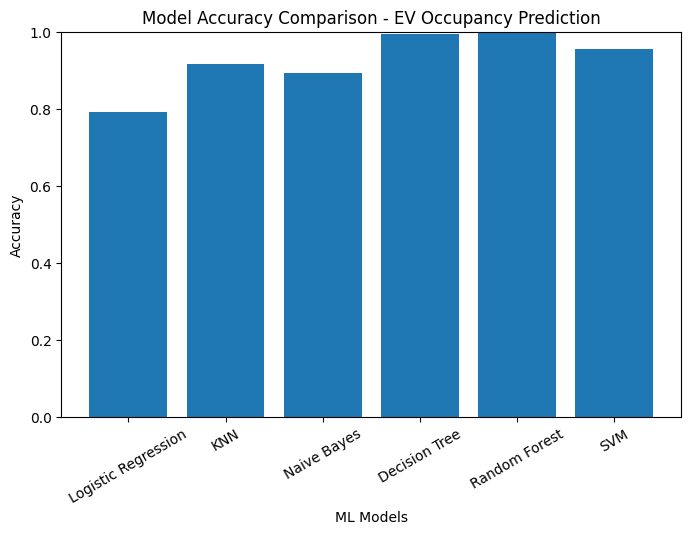

In [259]:
import matplotlib.pyplot as plt

# Model names
models = [
    "Logistic Regression",
    "KNN",
    "Naive Bayes",
    "Decision Tree",
    "Random Forest",
    "SVM"
]

# Accuracies (replace with your actual values if needed)
accuracies = [
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, knn_pred),
    accuracy_score(y_test, nb_pred),
    accuracy_score(y_test, dt_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, svm_pred)
]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies)
plt.xlabel("ML Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison - EV Occupancy Prediction")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.show()


In [260]:
import joblib

joblib.dump(rf, "ev_rf_model.pkl")

joblib.dump(scaler, "ev_scaler.pkl")

print("Model and Scaler saved successfully!")


Model and Scaler saved successfully!


In [261]:
import joblib

rf = joblib.load("ev_rf_model.pkl")
scaler = joblib.load("ev_scaler.pkl")


In [262]:
y_pred

array([0])

In [263]:
print(scaler.n_features_in_)


7


In [264]:

# import streamlit as st
# import numpy as np
# import joblib


# rf = joblib.load("ev_rf_model.pkl")
# scaler = joblib.load("ev_scaler.pkl")

# st.set_page_config(page_title="EV Occupancy Prediction")
# st.title("🔌 EV Charging Station Occupancy Prediction")



# station_id = st.number_input("Station ID", min_value=1, step=1)

# city_name = st.selectbox("City", ["City_A", "City_B", "City_C"])
# city_map = {"City_A": 0, "City_B": 1, "City_C": 2}
# city = city_map[city_name]

# day_name = st.selectbox("Day Type", ["Weekday", "Weekend"])
# day_map = {"Weekday": 0, "Weekend": 1}
# day_type = day_map[day_name]

# hour = st.slider("Hour", 0, 23)

# chargers = st.number_input("Number of Chargers", min_value=1, step=1)

# past_rate = st.slider("Past Occupancy Rate", 0.0, 1.0, 0.5)

# weather_name = st.selectbox("Weather", ["Clear", "Rainy", "Cloudy"])
# weather_map = {"Clear": 0, "Rainy": 1, "Cloudy": 2}
# weather = weather_map[weather_name]


# if st.button("Predict"):

#     input_data = np.array([[
#         station_id,
#         city,
#         day_type,
#         hour,
#         chargers,
#         past_rate,
#         weather
#     ]])

#     st.write("Input shape:", input_data.shape) 

#     input_scaled = scaler.transform(input_data)
#     prediction = rf.predict(input_scaled)

#     if prediction[0] == 1:
#         st.success("🚗 Station is BUSY")
#     else:
#         st.success("✅ Station is FREE")
# print(scaler.n_features_in_)


In [265]:
print("Scaler expects:", scaler.n_features_in_)


Scaler expects: 7


In [266]:
import streamlit as st
import numpy as np
import joblib

rf = joblib.load("ev_rf_model.pkl")
scaler = joblib.load("ev_scaler.pkl")

st.set_page_config(page_title="EV Occupancy Prediction", layout="centered")
st.title("🔌 EV Charging Station Occupancy Prediction")

st.markdown("Enter station details to predict occupancy status")


station_id = st.number_input("Station ID", min_value=1, max_value=10000, value=100)

city_name = st.selectbox(
    "City",
    ["Chennai", "Bangalore", "Hyderabad", "Mumbai"]
)
city_map = {
    "Chennai": 0,
    "Bangalore": 1,
    "Hyderabad": 2,
    "Mumbai": 3
}
city = city_map[city_name]

day_name = st.selectbox("Day Type", ["Weekday", "Weekend"])
day_map = {"Weekday": 0, "Weekend": 1}
day_type = day_map[day_name]

hour = st.slider("Hour of Day", 0, 23, 18)

chargers = st.number_input("Number of Chargers", min_value=1, max_value=50, value=6)

past_rate = st.slider("Past Occupancy Rate", 0.0, 1.0, 0.85)

weather_name = st.selectbox(
    "Weather",
    ["Clear", "Rainy", "Cloudy"]
)
weather_map = {"Clear": 0, "Rainy": 1, "Cloudy": 2}
weather = weather_map[weather_name]


if st.button("🔍 Predict Occupancy"):

    input_data = np.array([[ 
        station_id,
        city,
        day_type,
        hour,
        chargers,
        past_rate,
        weather
    ]])

    st.write("Input shape:", input_data.shape)
    st.write("Scaler expects:", scaler.n_features_in_)

    input_scaled = scaler.transform(input_data)

    prediction = rf.predict(input_scaled)
    probability = rf.predict_proba(input_scaled)[0][1]

    st.subheader("📊 Prediction Result")

    if probability >= 0.5:
        st.error(f"🚗 Station is BUSY (Probability: {probability:.2f})")
    else:
        st.success(f"✅ Station is FREE (Probability: {1-probability:.2f})")


2026-01-30 13:13:30.907 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 13:13:30.908 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 13:13:30.910 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 13:13:30.911 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 13:13:30.912 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 13:13:30.913 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 13:13:30.914 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 13:13:30.915 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar